<a href="https://colab.research.google.com/github/Chandradithya8/Machine_learning_Projects/blob/master/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum() # no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts() #not an imbalanced dataset

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


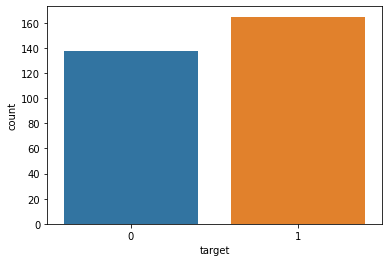

In [ ]:
import seaborn as sns
sns.countplot(df['target'])

In [ ]:
x=df.drop('target',axis=1)
y=df['target']

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
fit=scaler.fit_transform(x)
fit

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
data=pd.DataFrame(fit)
data.columns=x.columns
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [ ]:
data['target']=y
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

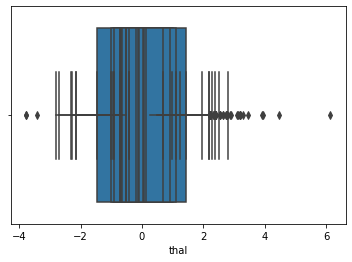

In [ ]:
#finding outliers
import seaborn as sns
for i in data.drop('target',axis=1).columns:
  sns.boxplot(data[i])

In [ ]:
import numpy as np
for i in data.drop('target',axis=1).columns:
  b=data[i].mean()+(3*data[i].std())
  c=data[i].mean()-(3*data[i].std())
  data[i]=np.where(data[i]>b,b,data[i])
  data[i]=np.where(data[i]<c,c,data[i])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

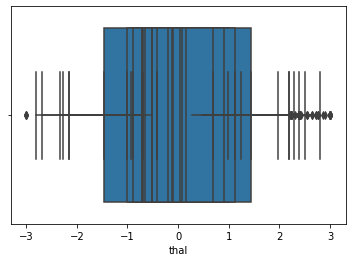

In [ ]:
for i in data.drop('target',axis=1).columns:
  sns.boxplot(data[i])

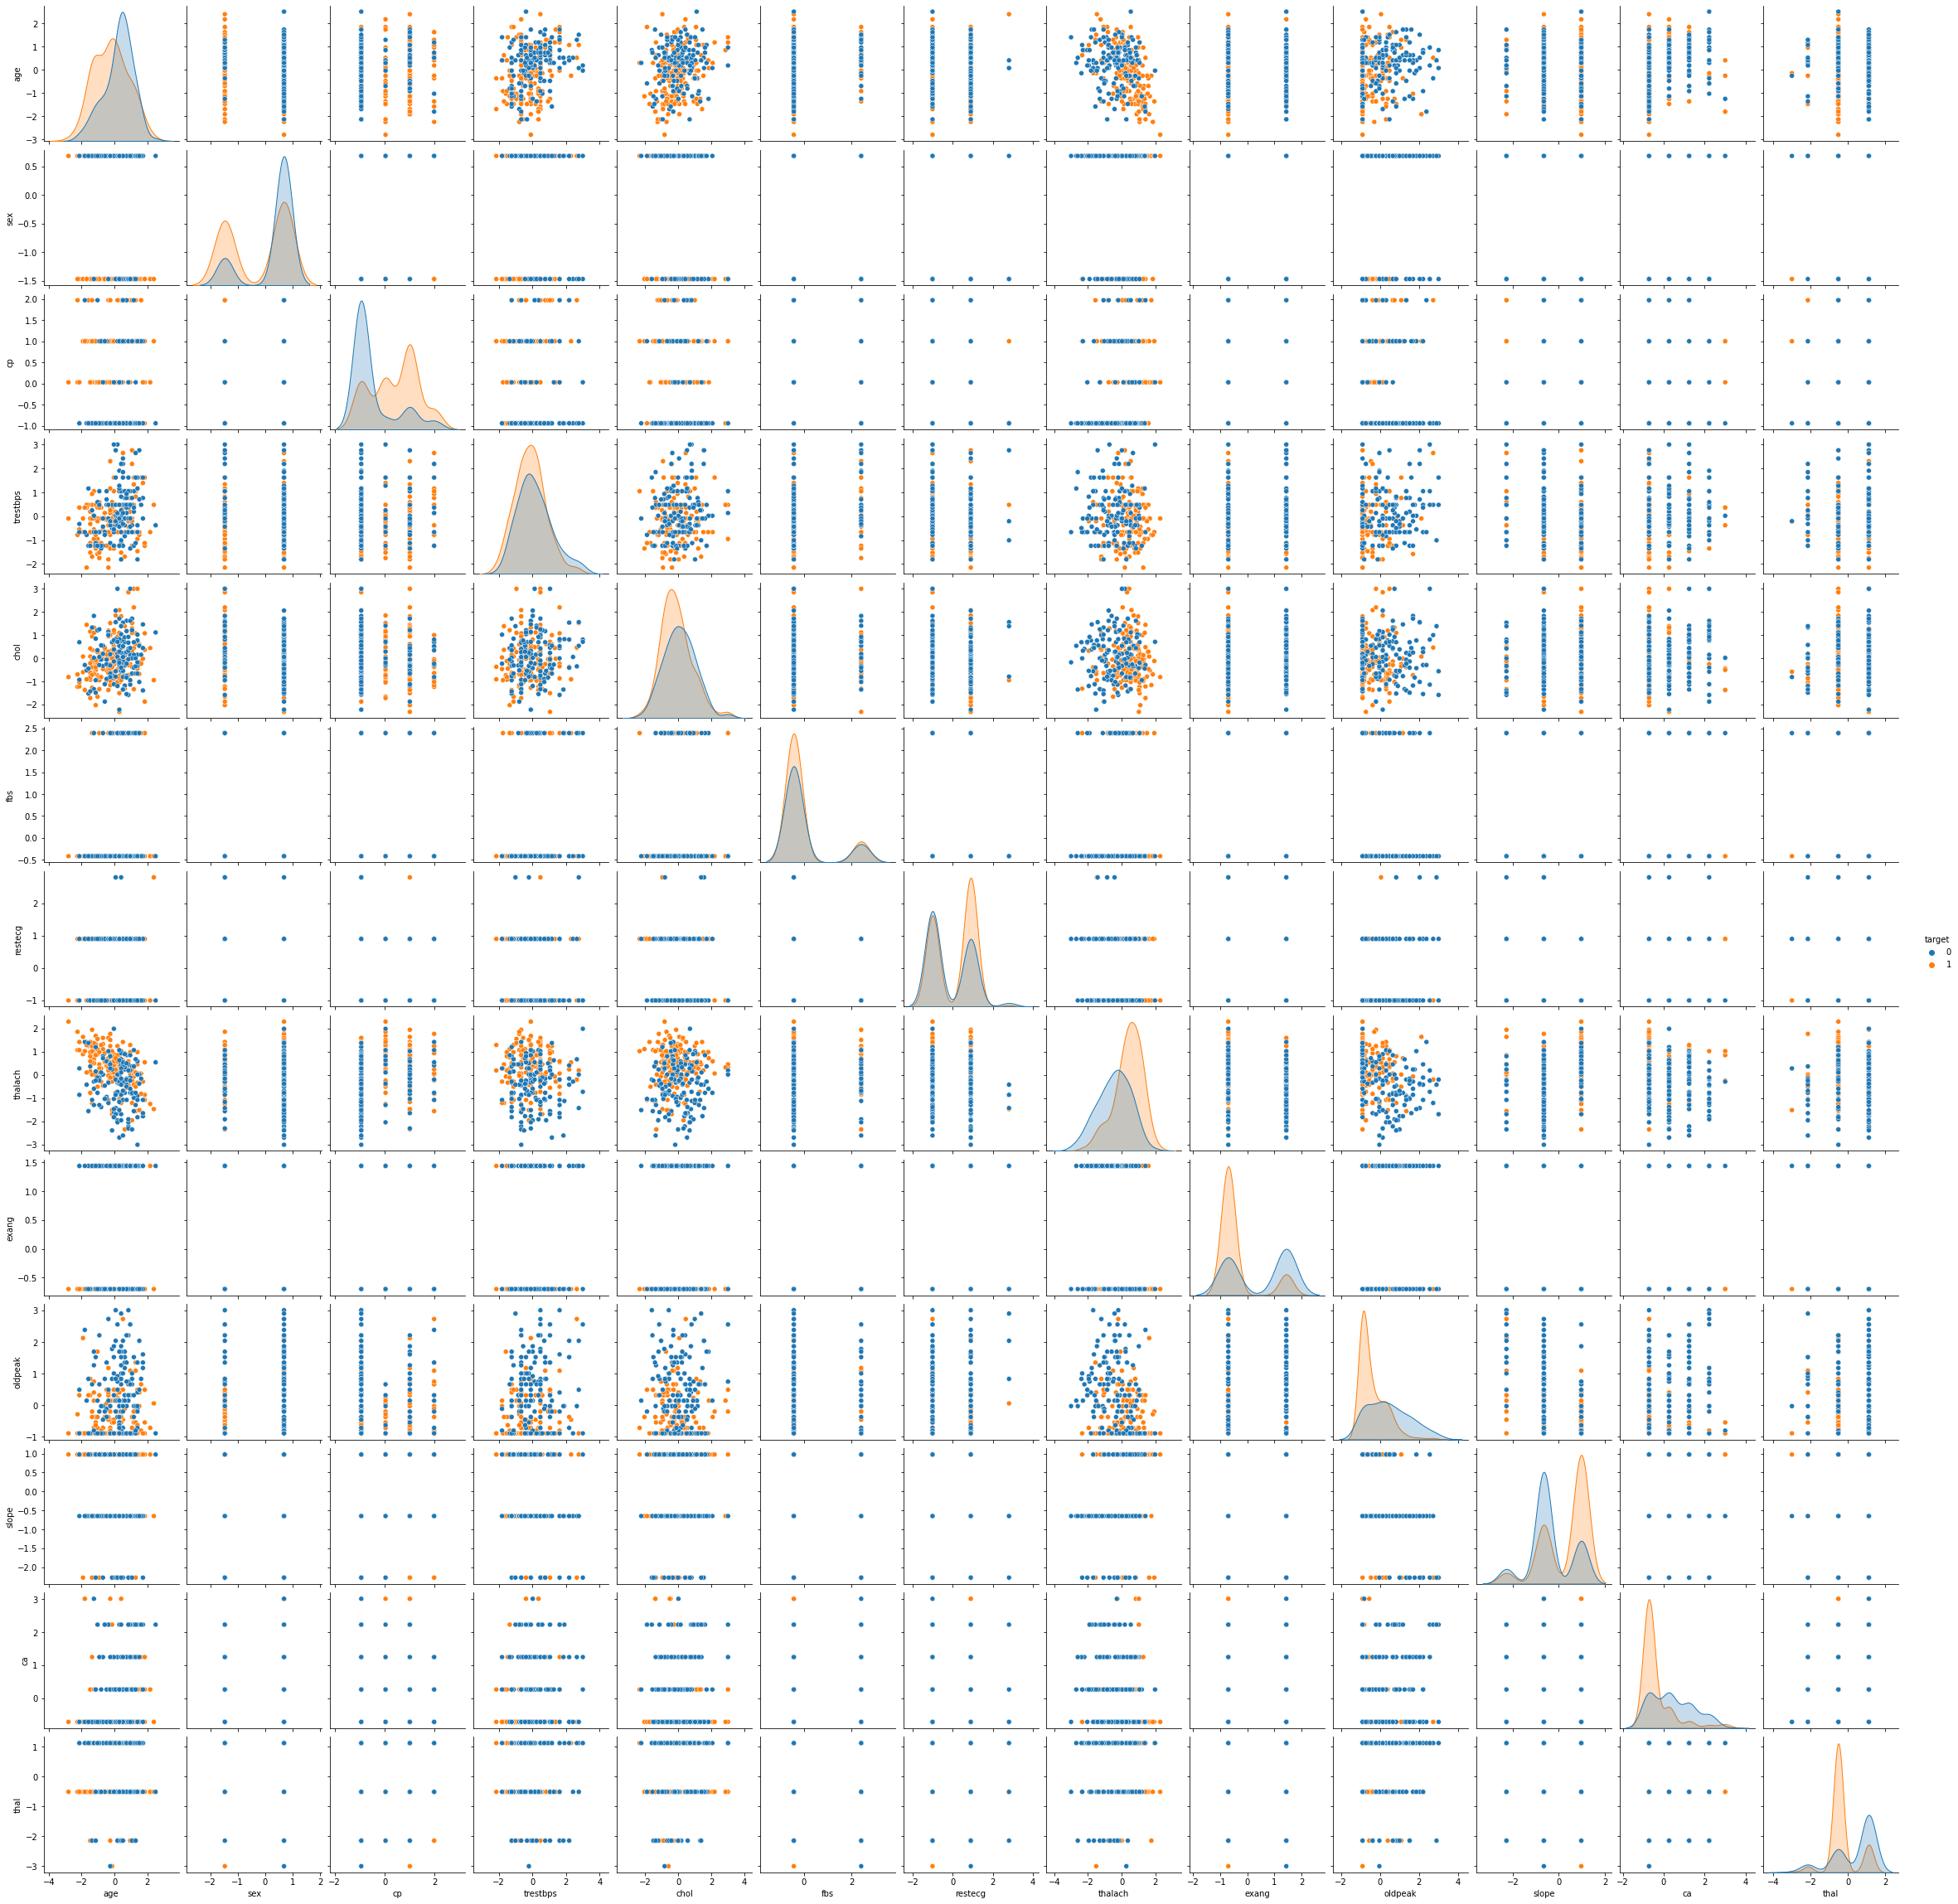

In [ ]:
sns.pairplot(data,hue='target')

In [ ]:
#feature selection
from sklearn.ensemble import ExtraTreesClassifier
d=ExtraTreesClassifier(n_estimators=100)
d.fit(data.drop('target',axis=1),data['target'])
d.feature_importances_

array([0.06524323, 0.0546587 , 0.12952292, 0.05994811, 0.06112634,
       0.01934139, 0.03557997, 0.08362262, 0.10158094, 0.09196731,
       0.06148302, 0.12294522, 0.11298022])

In [ ]:
e=pd.Series(d.feature_importances_,index=data.drop('target',axis=1).columns)
e

age         0.065243
sex         0.054659
cp          0.129523
trestbps    0.059948
chol        0.061126
fbs         0.019341
restecg     0.035580
thalach     0.083623
exang       0.101581
oldpeak     0.091967
slope       0.061483
ca          0.122945
thal        0.112980
dtype: float64

In [ ]:
x=data.drop('target',axis=1)
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
kfold=KFold(n_splits=5)

In [ ]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())
print(cross_val_score(SVC(),x,y,cv=5).mean())
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.735846994535519
0.8183060109289617
0.8118579234972678
0.8149180327868851
0.8116939890710382


In [ ]:
from sklearn.model_selection import GridSearchCV
r=RandomForestClassifier()
n_estimators=[int(x) for x in np.linspace(200,2000,10)]
max_depth=[int(x) for x in np.linspace(5,20,5)]
criterion=['gini','entropy']
params={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'criterion':criterion
    }

In [ ]:
gd=GridSearchCV(r,params,cv=5,n_jobs=-1,verbose=2)
gd.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 400}

In [ ]:
r=RandomForestClassifier(n_estimators=400,criterion='entropy',max_depth=20)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[26 10]
 [ 8 47]]
0.8021978021978022
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.82      0.85      0.84        55

    accuracy                           0.80        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.80      0.80        91



In [ ]:
k=KNeighborsClassifier(n_neighbors=12)
k.fit(x_train,y_train)
pred=k.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[31  5]
 [ 9 46]]
0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        36
           1       0.90      0.84      0.87        55

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.85      0.85      0.85        91

